### Our goal is to build a predictive model which will determine whether a text message is spam or ham.

### Understanding our dataset

The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam.

The files contain one message per line. Each line is composed by two columns: class (spam or ham) and raw message.

This data will be our labeled training set. Using these ham/spam examples, we'll train a machine learning model to learn to discriminate between ham/spam automatically. Then, with a trained model, we'll be able to classify arbitrary unlabeled messages as ham or spam.


   #### Importing required Libraries

In [27]:
#importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
%matplotlib inline

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Text Preprocessing
import nltk
nltk.download("stopwords")
nltk.download('wordnet')
from nltk.corpus import stopwords
import string
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer("english")

from wordcloud import WordCloud

## for model selection and pre-processing purpose
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.metrics import fbeta_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from textblob import TextBlob
## Importing Pickle for sanving and dumpig weights
import pickle

[nltk_data] Downloading package stopwords to /home/nikhil/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/nikhil/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [28]:
##Import your dataset and checking first 10 rows
df = pd.read_csv('/home/nikhil/Animesh/AI/for_github_projects/Spam_Ham/spam.csv',encoding = 'latin-1')
df.head(10)

,class,message,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


#### We can see that in this dataset we have three `Unnamed` columns , sowe will be removing the columns first

In [29]:
#so we remove them print them again to check
df = df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis = 1)
df.head(10)

,class,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


#### Now here we can see that the entire `Unnamed` columns are being removed and we move further.

#### Now for our better understanding we replacing or renaming the column name `class` as `label`.

In [30]:
## renaming and checking again
df = df.rename(columns={"class":"label"})
df.head(10)

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


### Visualization and Pre-processing

#### Now this is the part is most important part of Data Sciene.  We need to visualize and pre-process the data and distrubution of data so that we can move further. So visualization and pre-processing is a must you do before you train your model.

In [31]:
## Lets Check with the info first
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
label      5572 non-null object
message    5572 non-null object
dtypes: object(2)
memory usage: 87.1+ KB


#### `df.info` gives you the idea about your dataset , like what actually your datset have in it. You can see that your dataframe is havig `5572` of entries in which two columns are there named `label` and `message` and both having equal amount of entries.

#### So now we check the statistics of the two columns separetly for our understanding and futher we will be needing to train our model.

In [32]:
## It is grouping the two coulunms and its stats.
df.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

#### we can see that some of the messages are repeated. so no we check the most repeatative data.


In [33]:
#checking top-10 spam/ham messages
topMessages = df.groupby('message')['label'].agg([len, np.max]).sort_values(by = "len", ascending = False).head(n = 10)
display(topMessages)

,len,amax
message,,
"Sorry, I'll call later",30,ham
I cant pick the phone right now. Pls send a message,12,ham
Ok...,10,ham
Your opinion about me? 1. Over 2. Jada 3. Kusruthi 4. Lovable 5. Silent 6. Spl character 7. Not matured 8. Stylish 9. Simple Pls reply..,4,ham
"Wen ur lovable bcums angry wid u, dnt take it seriously.. Coz being angry is d most childish n true way of showing deep affection, care n luv!.. kettoda manda... Have nice day da.",4,ham
Please call our customer service representative on FREEPHONE 0808 145 4742 between 9am-11pm as you have WON a guaranteed å£1000 cash or å£5000 prize!,4,spam
Okie,4,ham
"Say this slowly.? GOD,I LOVE YOU &amp; I NEED YOU,CLEAN MY HEART WITH YOUR BLOOD.Send this to Ten special people &amp; u c miracle tomorrow, do it,pls,pls do it...",4,ham
"7 wonders in My WORLD 7th You 6th Ur style 5th Ur smile 4th Ur Personality 3rd Ur Nature 2nd Ur SMS and 1st \Ur Lovely Friendship\""... good morning dear""",4,ham


###### from this stats we can see that people seems busy 'Sorry, I'll call later' tops the ham messages , 'I cant pick the phone right now. Pls send a message' picks 2nd top with 12 ham , and then there are numbers 'ok...,ok.,okie 

In [34]:
#we can find the length of the message 
#so by adding a new column in dataframe and then we see the length of every message

df['length'] = df['message'].map(lambda text : len(text))
print(df.head())

  label                                            message  length
0   ham  Go until jurong point, crazy.. Available only ...     111
1   ham                      Ok lar... Joking wif u oni...      29
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...     155
3   ham  U dun say so early hor... U c already then say...      49
4   ham  Nah I don't think he goes to usf, he lives aro...      61


### Lets do some plotting

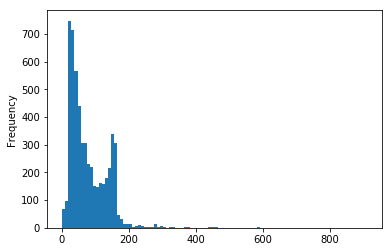

In [35]:
#now by plotting the histrogram we can have a better visualization
df.length.plot(bins = 100 , kind = 'hist')

##### We can see here maximum messages contains number of words in the range of [0, 200].

In [36]:
#checking the statstics of the lenght of message
df.length.describe()

count    5572.000000
mean       80.118808
std        59.690841
min         2.000000
25%        36.000000
50%        61.000000
75%       121.000000
max       910.000000
Name: length, dtype: float64

 here we can see that average lenght of the message is `80` and where minimum length is `2` and maximum legth is `910`

#### now we can show the difference between `ham` and `spam`

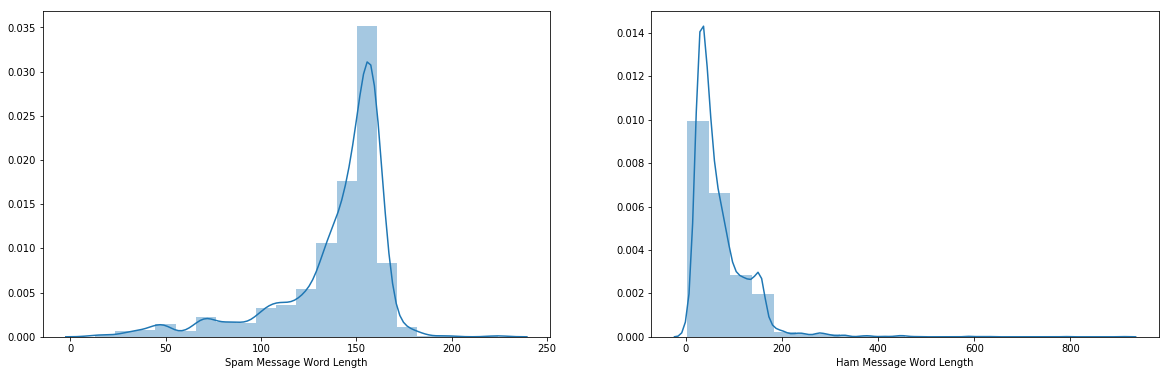

In [37]:
f , ax = plt.subplots(1, 2 , figsize = (20,6))
sb.distplot(df[df['label'] == 'spam']['length'],bins = 20 , ax = ax[0] )
ax[0].set_xlabel('Spam Message Word Length')

sb.distplot(df[df['label'] == 'ham']['length'],bins = 20 , ax = ax[1] )
ax[1].set_xlabel('Ham Message Word Length')

plt.show()

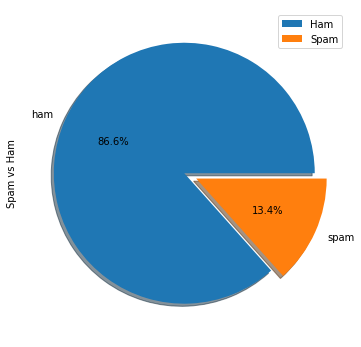

In [38]:
#now check the percentage of the distrubution of Ham message and Spam message .

df["label"].value_counts().plot(kind = 'pie', explode = [0,0.1], figsize = (6,6), autopct = '%1.1f%%', shadow = True)
plt.ylabel("Spam vs Ham")
plt.legend(["Ham", "Spam"])
plt.show()

In [39]:
# individual study of Ham and Spam message 

spam_messages = df[df["label"] == "spam"]["message"]
ham_messages = df[df["label"] == "ham"]["message"]

spam_words = []
ham_words = []

def extractSpamWords(spamMessages):
    global spam_words
    words = [word.lower() for word in word_tokenize(spamMessages) if word.lower() not in stopwords.words("english") and word.lower().isalpha()]
    spam_words = spam_words + words
    
def extractHamWords(hamMessages):
    global ham_words
    words = [word.lower() for word in word_tokenize(hamMessages) if word.lower() not in stopwords.words("english") and word.lower().isalpha()]
    ham_words = ham_words + words

spam_messages.apply(extractSpamWords)
ham_messages.apply(extractHamWords)

0       None
1       None
3       None
4       None
6       None
7       None
10      None
13      None
14      None
16      None
17      None
18      None
20      None
21      None
22      None
23      None
24      None
25      None
26      None
27      None
28      None
29      None
30      None
31      None
32      None
33      None
35      None
36      None
37      None
38      None
        ... 
5538    None
5539    None
5541    None
5542    None
5543    None
5544    None
5545    None
5546    None
5548    None
5549    None
5550    None
5551    None
5552    None
5553    None
5554    None
5555    None
5556    None
5557    None
5558    None
5559    None
5560    None
5561    None
5562    None
5563    None
5564    None
5565    None
5568    None
5569    None
5570    None
5571    None
Name: message, Length: 4825, dtype: object

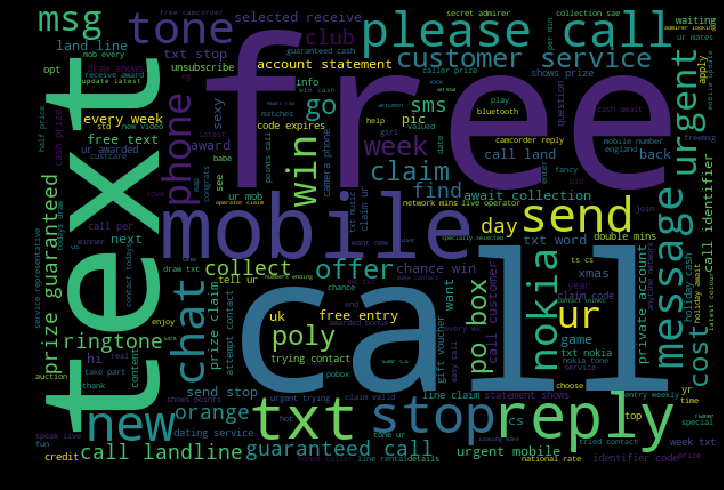

In [40]:
#spam word cloud

spam_wordcloud = WordCloud(width=600, height=400).generate(" ".join(spam_words))
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(spam_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

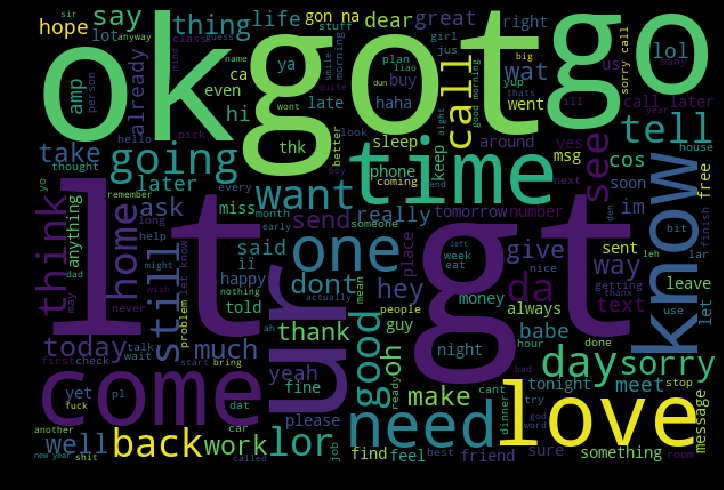

In [41]:
#ham word cloud


ham_wordcloud = WordCloud(width=600, height=400).generate(" ".join(ham_words))
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(ham_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [42]:
#now we see top 10 spam words

spam_words = np.array(spam_words)
print("Top 10 Spam words are :\n")
pd.Series(spam_words).value_counts().head(n = 10)

Top 10 Spam words are :



call      346
free      217
txt       156
u         144
ur        144
mobile    123
text      121
stop      114
claim     113
reply     104
dtype: int64

In [43]:
#top 10 ham words 

ham_words = np.array(ham_words)
print("Top 10 ham words are :\n")
pd.Series(ham_words).value_counts().head(n = 10)

Top 10 ham words are :



u       974
gt      318
lt      316
get     301
ok      246
go      246
got     242
ur      237
know    234
like    231
dtype: int64

### Again lets go the through the dataframe and display the dataframe .

In [44]:
print(df.shape)

(5572, 3)


In [45]:
df.head(10)

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
5,spam,FreeMsg Hey there darling it's been 3 week's n...,148
6,ham,Even my brother is not like to speak with me. ...,77
7,ham,As per your request 'Melle Melle (Oru Minnamin...,160
8,spam,WINNER!! As a valued network customer you have...,158
9,spam,Had your mobile 11 months or more? U R entitle...,154


## Train and Test dataset

In [46]:
#specifying features and labels
labels = df['label']
text = df['message']

In [47]:
#splitting datas into sets - train , test
x_train, x_remain, y_train, y_remain = train_test_split(text, labels, stratify = labels, random_state=0, test_size=0.3)

x_test, x_val, y_test, y_val = train_test_split(x_remain,y_remain,stratify = y_remain, random_state = 0, test_size = 0.5)

In [48]:
#check the shape of all three datasets

print("Training Data:",x_train.shape,y_train.shape )

print("Testing Data:", x_test.shape,y_test.shape)

print("Validation Data:", x_val.shape,y_val.shape )

Training Data: (3900,) (3900,)
Testing Data: (836,) (836,)
Validation Data: (836,) (836,)


### As it is an NLP Problem we need pre-process our data into Machine readable data , so we need convert every single text into Machine readable one as its shown below.

In [49]:
# create the transform
count_vec = CountVectorizer(stop_words='english')

# Learn the vocabulary dictionary and return term-document matrix.
x_train_counts = count_vec.fit_transform(x_train)


#Learn vocabulary and idf from training set.
tf_transformer = TfidfTransformer().fit(x_train_counts)

# Learn vocabulary and idf, return term-document matrix.
x_train_transformed = tf_transformer.transform(x_train_counts)

#test data
x_test_counts = count_vec.transform(x_test)
x_test_transformed = tf_transformer.transform(x_test_counts)

#converts classes into integer
labels = LabelEncoder()
y_train_labels_fit = labels.fit(y_train)
y_train_lables_trf = labels.transform(y_train)

### Building Our Machine Learning Model

In [50]:
model = MultinomialNB()

clf = model.fit(x_train_transformed,y_train_lables_trf)

calibrated_svc = CalibratedClassifierCV(base_estimator= model,cv = 'prefit')

calibrated_svc.fit(x_train_transformed,y_train_lables_trf)

predictions = calibrated_svc.predict(x_test_transformed)

Here we evaluate our trained model , how it is trained and how it is giving accurate result when we give unkown data to the model for testing. Here below you can see `Accuracy score` which gives you the idea of your model that how accurate is your model. `Precision score` is the ratio of correctly predicted positive observations to the total predicted positive observations. `Recall score`is the ratio of correctly predicted positive observations to the all observations in actual class - yes. `F1 score` is the weighted average of Precision and Recall.

In [51]:
print('Accuracy score: ', format(accuracy_score(labels.transform(y_test), predictions)))
print('Precision score: ', format(precision_score(labels.transform(y_test), predictions)))
print('Recall score: ', format(recall_score(labels.transform(y_test), predictions)))
print('F1 score: ', format(f1_score(labels.transform(y_test), predictions)))

Accuracy score:  0.9748803827751196
Precision score:  0.941747572815534
Recall score:  0.8660714285714286
F1 score:  0.9023255813953488


#### And now comes to the last part , this part is actually different from entire Mahine Process.
### Deployment

In [52]:
weights = 'spam_detection_mnb.sav'
pickle.dump(calibrated_svc,open(weights,'wb'))

vocab = 'vocabulary_mnb.sav'
pickle.dump(count_vec, open(vocab, 'wb'))

tfidf = 'tfidf_mnb.sav'
pickle.dump(tf_transformer,open(tfidf,'wb'))

#### By the time you run this cell you see three of the weihgts are being saved in your current directory folder with `.sav` extension .These weights are used to deploy your model.